# Project 15: Text2SQL via Prompt Engineering

# Text-to-SQL: Bridging the Gap Between Human Language and Databases


Text-to-SQL, also known as Natural Language to SQL (NL2SQL), is a rapidly evolving technology that translates natural, everyday language into Structured Query Language (SQL) commands. This innovative approach empowers users to interact with and retrieve data from databases simply by asking questions in plain English, eliminating the need for specialized knowledge of complex SQL syntax.

At its core, Text-to-SQL acts as an intelligent translator. It leverages the power of artificial intelligence, particularly **Natural Language Processing (NLP)** and sophisticated **AI models**, to understand the user's intent and generate the corresponding SQL query. This process allows individuals without a technical background to explore and analyze data, thereby democratizing data access within an organization.



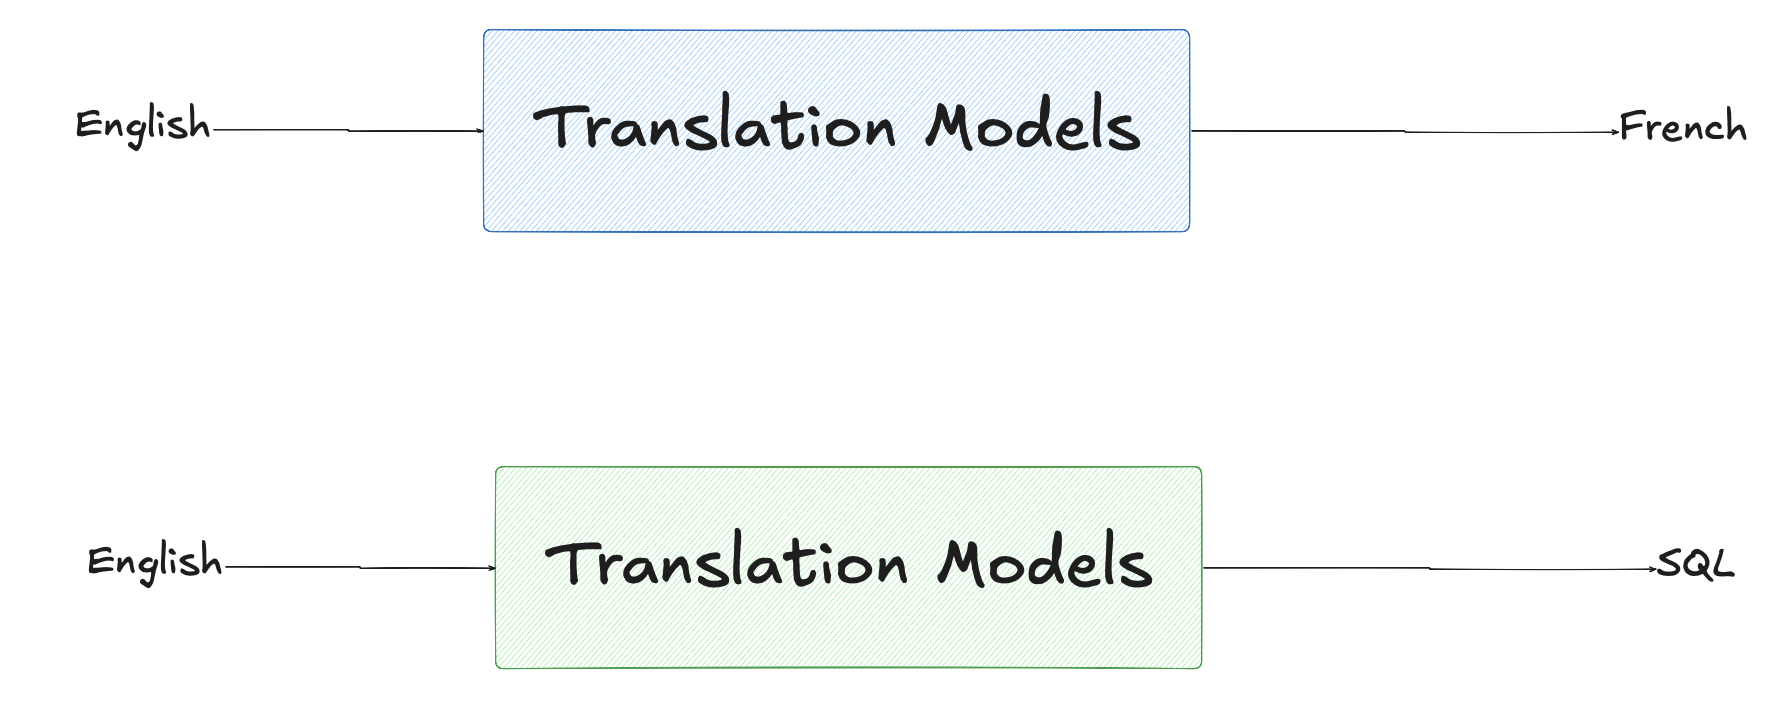

## How It Works: From a Simple Question to a Complex Query

The conversion of a user's question into an executable SQL query involves a multi-step process:

1.  **Natural Language Understanding (NLU):** The system first analyzes the user's input to decipher its meaning. This involves identifying key entities (like specific columns or tables), the relationships between them, and the user's ultimate goal (e.g., to filter, aggregate, or sort data).

2.  **Schema Linking:** Once the intent is understood, the system maps the identified entities from the natural language question to the specific tables and columns within the database's schema. This is a critical step to ensure the generated query is accurate and relevant to the available data structure.

3.  **SQL Generation:** With the user's intent and the relevant database schema components identified, the AI model constructs the appropriate SQL query. This can range from a simple `SELECT` statement to a complex query involving multiple `JOIN`s, `WHERE` clauses, and aggregate functions.

4.  **Query Execution and Response:** The generated SQL query is then executed against the database. The retrieved data is presented back to the user in a clear and understandable format, often as a table, chart, or a natural language summary.

## Key Applications and Use Cases

The ability to query databases using natural language has a wide array of applications across various industries:

* **Business Intelligence (BI) and Analytics:** Business analysts and decision-makers can quickly get answers to their data-driven questions without relying on data scientists or IT professionals. This accelerates the pace of analysis and reporting.
* **Data Exploration:** For both technical and non-technical users, Text-to-SQL provides an intuitive way to explore large and unfamiliar datasets, uncover insights, and formulate more specific data requests.
* **Customer Support:** Chatbots and virtual assistants integrated with Text-to-SQL can provide customers with real-time information by querying relevant databases based on their questions.
* **E-commerce:** Users can search for products using natural language filters and criteria, which are then translated into database queries to retrieve the most relevant results.

## The Advantages and Challenges

**Benefits:**

* **Increased Accessibility:** It breaks down the barrier to data, allowing a broader range of users to perform data analysis.
* **Improved Efficiency:** It significantly speeds up the process of data retrieval and report generation.
* **Reduced Reliance on Technical Experts:** It frees up data professionals from writing routine queries, allowing them to focus on more complex tasks.

**Challenges:**

* **Ambiguity of Natural Language:** Human language is often imprecise and context-dependent, which can lead to misinterpretation by the AI and the generation of incorrect queries.
* **Complex Database Schemas:** Large and intricately designed databases can pose a significant challenge for the AI to navigate and understand the relationships between numerous tables and columns.
* **Handling Complex Queries:** While proficient at generating simpler queries, Text-to-SQL systems can sometimes struggle with highly complex requests that require deep domain knowledge and intricate logic.

Despite these challenges, the field of Text-to-SQL is continuously advancing, with ongoing research focused on improving the accuracy, robustness, and capabilities of these powerful systems. As AI models become more sophisticated, Text-to-SQL is poised to become an indispensable tool for seamless and intuitive data interaction.

# TANGENT Zero
Let's take a minute to look at https://bird-bench.github.io/

# Our Approach
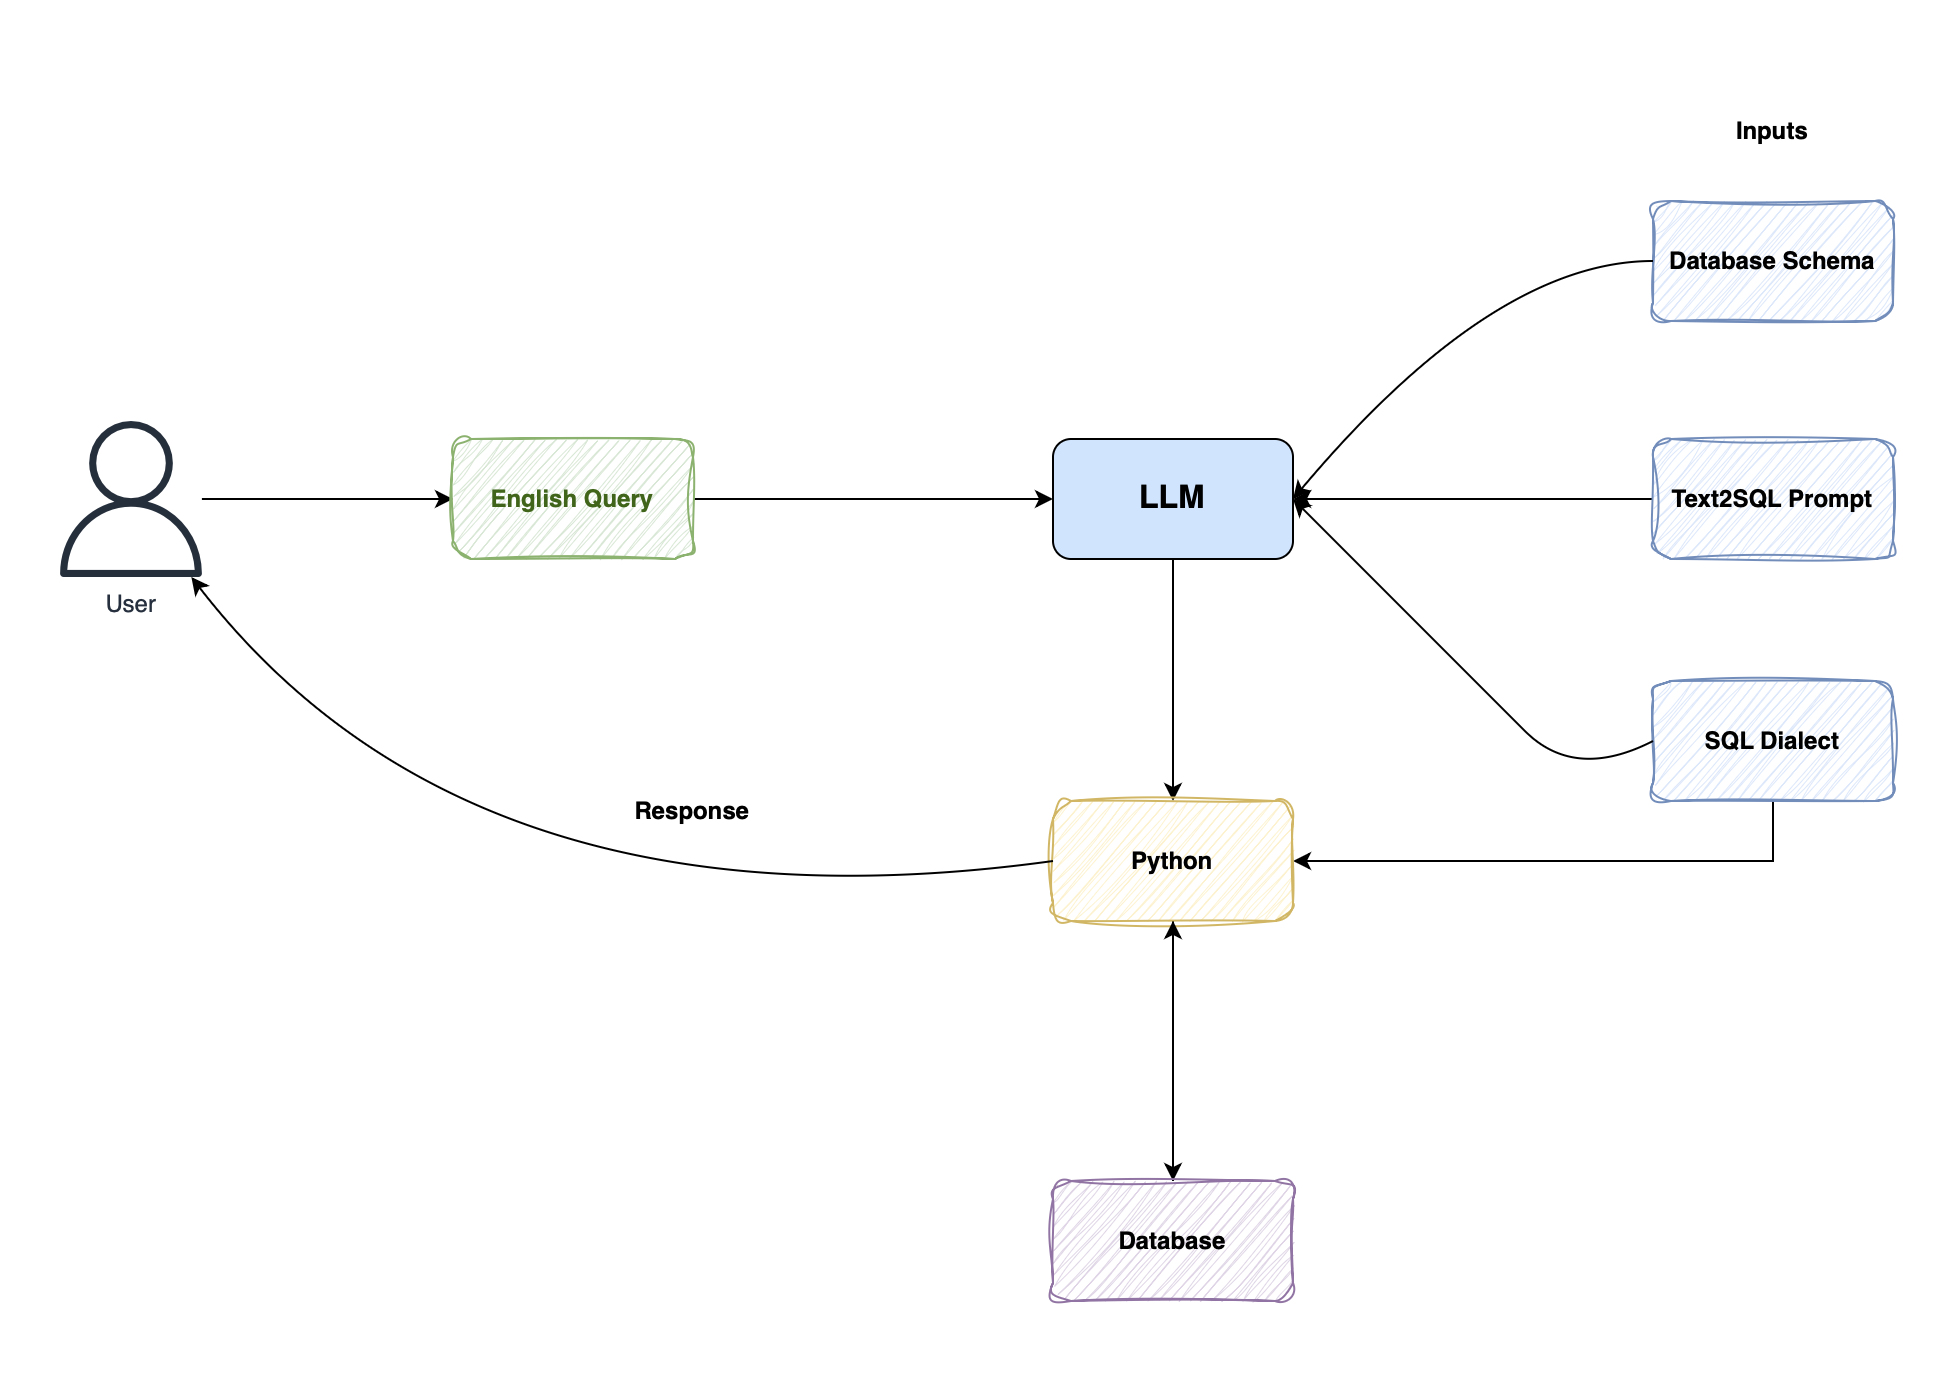

# Tangent 1: You should know about Mockaroo

http://mockaroo.com

## Retrieve data

In [ ]:
! curl "https://api.mockaroo.com/api/dde01370?count=1000&key=11149690" > "customers.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 99674    0 99674    0     0  82737      0 --:--:--  0:00:01 --:--:-- 82785


In [ ]:
! curl "https://api.mockaroo.com/api/8ba6f630?count=1000&key=11149690" > "products.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  689k    0  689k    0     0   431k      0 --:--:--  0:00:01 --:--:--  431k


In [ ]:
! curl "https://api.mockaroo.com/api/6fa67fe0?count=3000&key=11149690" > "orders.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  230k    0  230k    0     0  49759      0 --:--:--  0:00:04 --:--:-- 59958


## Setup database

In [ ]:
import sqlite3
import pandas as pd
import os

In [ ]:
# Define SQL schemas for creating tables
customers_schema = """
CREATE TABLE IF NOT EXISTS customers (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    address VARCHAR(50),
    city VARCHAR(50),
    country VARCHAR(50),
    postal_code VARCHAR(50),
    loyalty_points INT
);
"""

products_schema = """
CREATE TABLE IF NOT EXISTS products (
    product_id INT PRIMARY KEY,
    product_name TEXT,
    description TEXT,
    price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    category VARCHAR(50),
    brand TEXT,
    stock_quantity INT,
    color VARCHAR(50),
    size VARCHAR(20),
    weight DECIMAL(5,2),
    dimensions TEXT,
    release_date DATE,
    rating DECIMAL(3,1),
    reviews_count INT,
    seller_name TEXT,
    seller_rating DECIMAL(3,1),
    seller_reviews_count INT,
    shipping_method VARCHAR(20),
    shipping_cost DECIMAL(6,2)
);
"""

orders_schema = """
CREATE TABLE IF NOT EXISTS orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    product_id INT,
    quantity INT,
    unit_price DECIMAL(10,2),
    total_price DECIMAL(10,2),
    order_date DATE,
    shipping_address VARCHAR(255),
    payment_method VARCHAR(20),
    status VARCHAR(20),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);
"""

In [ ]:
db_name = 'ecommerce.db'
if os.path.exists(db_name):
    os.remove(db_name)
    print(f"Removed existing database '{db_name}'.")

In [ ]:
import sqlite3
import pandas as pd
import os



COLUMN_DATA_TYPES = {
    'customers': {
        'customer_id': 'int64',
        'first_name': 'object',
        'last_name': 'object',
        'email': 'object',
        'phone_number': 'object',
        'address': 'object',
        'city': 'object',
        'country': 'object',
        'postal_code': 'object',
        'loyalty_points': 'int64'
    },
    'products': {
        'product_id': 'int64',
        'product_name': 'object',
        'description': 'object',
        'price': 'float64',
        'discount_percentage': 'float64',
        'category': 'object',
        'brand': 'object',
        'stock_quantity': 'int64',
        'color': 'object',
        'size': 'object',
        'weight': 'float64',
        'dimensions': 'object',
        'release_date': 'datetime64[ns]',
        'rating': 'float64',
        'reviews_count': 'int64',
        'seller_name': 'object',
        'seller_rating': 'float64',
        'seller_reviews_count': 'int64',
        'shipping_method': 'object',
        'shipping_cost': 'float64'
    },
    'orders': {
        'order_id': 'int64',
        'customer_id': 'int64',
        'product_id': 'int64',
        'quantity': 'int64',
        'unit_price': 'float64',
        'total_price': 'float64',
        'order_date': 'datetime64[ns]',
        'shipping_address': 'object',
        'payment_method': 'object',
        'status': 'object'
    }
}

# --- Database setup ---
db_name = 'ecommerce.db'
conn = None  # Initialize connection to None

try:
    # Establish a connection to the SQLite database
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    print(f"Database '{db_name}' created and connected successfully.")

    # Create tables
    cursor.execute(customers_schema)
    cursor.execute(products_schema)
    cursor.execute(orders_schema)
    print("Tables 'customers', 'products', and 'orders' created successfully.")

    # --- Load data from CSV files into the tables using pandas ---
    csv_to_table_map = {
        '/content/customers.csv': 'customers',
        '/content/products.csv': 'products',
        '/content/orders.csv': 'orders'
    }

    for csv_file, table_name in csv_to_table_map.items():
        if os.path.exists(csv_file):
            print(f"\nProcessing '{csv_file}' for table '{table_name}'...")

            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # 1. Get the expected schema for the current table
            expected_schema = COLUMN_DATA_TYPES[table_name]
            expected_cols = list(expected_schema.keys())

            # 2. Handle missing/extra columns
            # Drop columns from DataFrame that are not in the schema
            df = df[df.columns.intersection(expected_cols)]

            # Add any missing columns and fill with None (which becomes NULL in SQL)
            for col in expected_cols:
                if col not in df.columns:
                    df[col] = None

            # 3. Reorder columns to match the defined schema exactly
            df = df[expected_cols]

            # 4. Enforce data types
            for col, dtype in expected_schema.items():
                if 'datetime' in dtype:
                    # Use pd.to_datetime for date/time columns, coercing errors to NaT (Not a Time)
                    df[col] = pd.to_datetime(df[col], errors='coerce')
                else:
                    # Use astype for other columns, handling potential conversion errors
                    try:
                        df[col] = df[col].astype(dtype)
                    except (ValueError, TypeError) as e:
                        print(f"  - Warning: Could not convert column '{col}' to {dtype}. Error: {e}. Leaving as is.")


            # Use the to_sql method to insert the cleaned DataFrame
            df.to_sql(table_name, conn, if_exists='append', index=False)
            print(f"  -> Data from '{csv_file}' loaded into '{table_name}' table successfully.")
        else:
            print(f"Warning: '{csv_file}' not found. Skipping data load for '{table_name}'.")

    # Commit the changes to the database
    conn.commit()
    print("\nData committed to the database successfully. 🎉")

except sqlite3.Error as e:
    print(f"Database error: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Pandas error: {e}. One of the CSV files might be empty.")
except KeyError as e:
    print(f"Schema definition error: A column is missing from the TABLE_DATA_TYPES dictionary: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Close the connection if it was established
    if conn:
        conn.close()
        print("Database connection closed.")

Database 'ecommerce.db' created and connected successfully.
Tables 'customers', 'products', and 'orders' created successfully.

Processing '/content/customers.csv' for table 'customers'...
  -> Data from '/content/customers.csv' loaded into 'customers' table successfully.

Processing '/content/products.csv' for table 'products'...
  -> Data from '/content/products.csv' loaded into 'products' table successfully.

Processing '/content/orders.csv' for table 'orders'...
  -> Data from '/content/orders.csv' loaded into 'orders' table successfully.

Data committed to the database successfully. 🎉
Database connection closed.


# Tangent 2: You should setup your free API Key using Google's AI Studio

https://aistudio.google.com/


### Install Gen AI library

We will be installing of the google-generativeai package, the official Python SDK for the Gemini API.

In [ ]:
!pip install google-genai

### Import required modules

In [ ]:
from google import genai
from google.colab import userdata

In [ ]:
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

# Tangent 3: You should learn about Prompt Engineering

## The Anatomy of an Effective Prompt: A Unified Framework

A fundamental advancement in prompt engineering is the realization that a prompt is not a monolithic question but a structured document composed of distinct components.



- **Role (or Persona):** This component defines who the model should be. Assigning a role, such as "You are a senior technical support specialist," constrains the model's vast knowledge base, forcing it to filter its response through a specific lens of expertise, tone, and style. This dramatically improves the coherence and domain-specificity of the output.


- **Context (or Background Information):** This provides the necessary background for the task. It can include user history, product documentation, previous conversation turns, or any other data that informs the query. Providing rich context is essential for generating relevant and personalized responses.


- **Task (or Instruction/Directive):** This is the core of the prompt—a clear, specific, and unambiguous statement of the action the model should perform. The use of direct action verbs (e.g., "Analyze," "Summarize," "Generate," "Classify") is critical for clarity.


- **Examples (or Shots):** These are high-quality examples of the desired input-output pattern. They are the foundation of few-shot prompting and are one of the most powerful tools for controlling output format and style. By showing the model exactly what is expected, examples enable a form of in-context learning.


- **Constraints (or Rules/Warnings):** This component defines the boundaries for the response. It specifies what the model should not do, such as avoiding certain topics, adhering to a word count, or refraining from using technical jargon. These "guardrails" are crucial for safety and brand alignment.


- **Output Format (or Structure):** This explicitly defines the structure of the desired output, such as JSON, Markdown, or a bulleted list. Specifying the format is vital for applications that need to programmatically parse the model's response, as it ensures the output is machine-readable and consistent.

To help the model distinguish between these different components, it is a best practice to use clear delimiters. Structuring the prompt with markers like Markdown headers (e.g., `###Instruction###`).

##Hello

[Unified Framework For An Effective Prompt](https://www.geeksforgeeks.org/data-science/a-unified-framework-for-an-effective-prompt/)

In [19]:
prompt = """

###ROLE###
You are a highly skilled Text-to-SQL translator with expertise in SQL syntax, database schema interpretation, and natural language understanding. You generate syntactically correct and semantically accurate SQL queries based on user input and a given database schema.

###CONTEXT###
The user is working with a relational database for an e-commerce platform. The database includes three main tables: `customers`, `products`, and `orders`. The goal is to allow users to input natural language queries (in English), and have the model return equivalent SQL statements that accurately extract the requested data using the given schema.

Here is the full schema:

**Customers Table**
```sql
CREATE TABLE IF NOT EXISTS customers (
    customer_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    email VARCHAR(50),
    phone_number VARCHAR(50),
    address VARCHAR(50),
    city VARCHAR(50),
    country VARCHAR(50),
    postal_code VARCHAR(50),
    loyalty_points INT
);
````

**Products Table**

```sql
CREATE TABLE IF NOT EXISTS products (
    product_id INT PRIMARY KEY,
    product_name TEXT,
    description TEXT,
    price DECIMAL(10,2),
    discount_percentage DECIMAL(5,2),
    category VARCHAR(50),
    brand TEXT,
    stock_quantity INT,
    color VARCHAR(50),
    size VARCHAR(20),
    weight DECIMAL(5,2),
    dimensions TEXT,
    release_date DATE,
    rating DECIMAL(3,1),
    reviews_count INT,
    seller_name TEXT,
    seller_rating DECIMAL(3,1),
    seller_reviews_count INT,
    shipping_method VARCHAR(20),
    shipping_cost DECIMAL(6,2)
);
```

**Orders Table**

```sql
CREATE TABLE IF NOT EXISTS orders (
    order_id INT PRIMARY KEY,
    customer_id INT,
    product_id INT,
    quantity INT,
    unit_price DECIMAL(10,2),
    total_price DECIMAL(10,2),
    order_date DATE,
    shipping_address VARCHAR(255),
    payment_method VARCHAR(20),
    status VARCHAR(20),
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);
```

###TASK###
Your task is to:

1. Read a natural language query about the e-commerce data.
2. Interpret the user's intent based on the schema provided.
3. Generate a valid SQL `SELECT` query that returns the expected result.
4. Ensure correct table joins, column selection, filtering, and grouping as necessary.
5. Handle aggregate functions (e.g., `COUNT`, `AVG`, `SUM`) where appropriate.
6. Disambiguate user terms based on schema details (e.g., "buyer" → `customers`, "product rating" → `products.rating`, etc.).

###CONSTRAINTS###

* Only return a valid SQL query as output — no explanations or extra text.
* The user is using sqllite database - respond with correct and valid sqllite syntax
* Use aliases (`AS`) for column names only when the original name is ambiguous.
* Do not create or modify tables.
* Do not assume the existence of tables or columns not provided in the schema.
* Avoid subqueries unless absolutely necessary for correctness or performance.
* Prefer readability: indent joins and clauses properly.

###EXAMPLES###
**Input:** "Show me the names and emails of customers from Canada who have more than 1000 loyalty points."
**Output:**

```sql
SELECT first_name, last_name, email
FROM customers
WHERE country = 'Canada' AND loyalty_points > 1000;
```

**Input:** "List the top 5 products with the highest ratings and their categories."
**Output:**

```sql
SELECT product_name, category, rating
FROM products
ORDER BY rating DESC
LIMIT 5;
```

**Input:** "How many orders were placed in August 2025?"
**Output:**

```sql
SELECT COUNT(*) AS total_orders
FROM orders
WHERE order_date BETWEEN '2025-08-01' AND '2025-08-31';
```

**Input:** "What is the average shipping cost for products sold by sellers with a rating above 4.5?"
**Output:**

```sql
SELECT AVG(shipping_cost) AS average_shipping_cost
FROM products
WHERE seller_rating > 4.5;
```

###OUTPUT FORMAT###
Return only the sqllite SQL query as a code block using triple backticks and the `sql` language tag, like this:

```sql
-- Your SQL query here
```
"""

In [20]:
import json
def get_sql_query_via_gemini(genai_client, prompt, user_query):

  # https://www.geeksforgeeks.org/python/formatted-string-literals-f-strings-python/
  contents = f"""
  {prompt}

  Here's the user query in english you need to work on:
  {user_query}
  """
  response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)
  # print(response) # uncomment this and understand at the output

  # Access the usage_metadata attribute
  usage_metadata = response.usage_metadata

  # Print the different token counts
  print(f"Input Token Count: {usage_metadata.prompt_token_count}")
  print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
  print(f"Output Token Count: {usage_metadata.candidates_token_count}")
  print(f"Total Token Count: {usage_metadata.total_token_count}")

  output = response.text.replace('```sql', '').replace('```', '')

  return output


In [21]:
import sqlite3
import pandas as pd

def execute_query(query, db_name='ecommerce.db'):

    conn = None
    try:
        # Connect to the database
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()

        # Execute the query
        print(f"\nExecuting query on '{db_name}':\n{query}")
        cursor.execute(query)

        # Fetch all results
        results = cursor.fetchall()

        # Get column names from the cursor description
        columns = [description[0] for description in cursor.description]

        # Format results as a dataframe for easier use
        results_as_dict = [dict(zip(columns, row)) for row in results]
        results_df = pd.DataFrame(results_as_dict)

        print("Query executed successfully.")
        return results_df

    except sqlite3.Error as e:
        print(f"Database error executing query: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
    finally:
        if conn:
            conn.close()

In [22]:
def text2sql(genai_client, prompt, user_query):
  output = get_sql_query_via_gemini(genai_client, prompt, user_query)
  results = execute_query(output)
  return results

In [23]:
text2sql(genai_client, prompt, "Show me the order count by country")

Input Token Count: 1136
Thoughts Token Count: 55
Output Token Count: 53
Total Token Count: 1244

Executing query on 'ecommerce.db':

SELECT c.country, COUNT(o.order_id) AS order_count
FROM orders AS o
JOIN customers AS c
  ON o.customer_id = c.customer_id
GROUP BY c.country;

Query executed successfully.


,country,order_count
0,Afghanistan,22
1,Aland Islands,3
2,Albania,10
3,Angola,5
4,Argentina,45
...,...,...
113,Uzbekistan,2
114,Venezuela,11
115,Vietnam,16
116,Yemen,9


In [24]:
text2sql(genai_client, prompt, "What are my most popular products")

Input Token Count: 1135
Thoughts Token Count: 827
Output Token Count: 74
Total Token Count: 2036

Executing query on 'ecommerce.db':

SELECT
  p.product_name,
  SUM(o.quantity) AS total_quantity_sold
FROM products AS p
JOIN orders AS o
  ON p.product_id = o.product_id
GROUP BY
  p.product_name
ORDER BY
  total_quantity_sold DESC;

Query executed successfully.


,product_name,total_quantity_sold
0,nulla dapibus dolor vel est donec odio justo s...,538
1,porttitor lorem id ligula suspendisse ornare c...,519
2,ut erat id mauris vulputate elementum nullam v...,491
3,viverra dapibus nulla suscipit ligula in lacus...,481
4,est et tempus semper est quam pharetra magna a...,473
...,...,...
920,a pede posuere nonummy integer non velit donec...,13
921,ante ipsum primis in faucibus orci luctus et u...,10
922,nonummy maecenas tincidunt lacus at velit viva...,5
923,tincidunt ante vel ipsum praesent blandit laci...,4


In [25]:
text2sql(genai_client, prompt, "which country ranks in middle by total sales??")

Input Token Count: 1138
Thoughts Token Count: 1200
Output Token Count: 167
Total Token Count: 2505

Executing query on 'ecommerce.db':

WITH CountrySales AS (
    SELECT
        c.country,
        SUM(o.total_price) AS total_sales
    FROM
        customers AS c
    JOIN
        orders AS o ON c.customer_id = o.customer_id
    GROUP BY
        c.country
),
RankedCountrySales AS (
    SELECT
        country,
        total_sales,
        ROW_NUMBER() OVER (ORDER BY total_sales DESC) AS sales_rank,
        COUNT(*) OVER () AS total_countries
    FROM
        CountrySales
)
SELECT
    country
FROM
    RankedCountrySales
WHERE
    sales_rank = CEIL(total_countries * 1.0 / 2);

Query executed successfully.


,country
0,Sri Lanka


In [26]:
text2sql(genai_client, prompt, "What is the 2nd highest sold product for each country?")

Input Token Count: 1142
Thoughts Token Count: 909
Output Token Count: 223
Total Token Count: 2274

Executing query on 'ecommerce.db':

WITH ProductSalesByCountry AS (
    SELECT
        c.country,
        p.product_name,
        SUM(o.quantity) AS total_sold_quantity
    FROM
        orders AS o
    JOIN
        customers AS c ON o.customer_id = c.customer_id
    JOIN
        products AS p ON o.product_id = p.product_id
    GROUP BY
        c.country,
        p.product_name
),
RankedProductSales AS (
    SELECT
        country,
        product_name,
        total_sold_quantity,
        RANK() OVER (PARTITION BY country ORDER BY total_sold_quantity DESC) AS sales_rank
    FROM
        ProductSalesByCountry
)
SELECT
    country,
    product_name,
    total_sold_quantity
FROM
    RankedProductSales
WHERE
    sales_rank = 2
ORDER BY
    country, total_sold_quantity DESC;

Query executed successfully.


,country,product_name,total_sold_quantity
0,Afghanistan,erat quisque erat eros viverra eget congue ege...,98
1,Aland Islands,eget orci vehicula condimentum curabitur in li...,48
2,Albania,quisque porta volutpat erat quisque erat eros ...,95
3,Angola,condimentum neque sapien placerat ante nulla j...,85
4,Argentina,iaculis diam erat fermentum justo nec condimen...,92
...,...,...,...
113,Uzbekistan,augue luctus tincidunt nulla mollis molestie l...,50
114,Venezuela,libero nullam sit amet turpis elementum ligula...,80
115,Vietnam,dolor quis odio consequat varius integer ac le...,78
116,Yemen,suspendisse potenti nullam porttitor lacus at ...,87


In [27]:
text2sql(genai_client, prompt, "rank and count of sales of India by total sales??")

Input Token Count: 1140
Thoughts Token Count: 1068
Output Token Count: 122
Total Token Count: 2330

Executing query on 'ecommerce.db':

SELECT
  c.first_name,
  c.last_name,
  SUM(o.total_price) AS total_sales,
  COUNT(o.order_id) AS sales_count
FROM customers AS c
JOIN orders AS o
  ON c.customer_id = o.customer_id
WHERE
  c.country = 'India'
GROUP BY
  c.customer_id,
  c.first_name,
  c.last_name
ORDER BY
  total_sales DESC;

Query executed successfully.


""


In [28]:
text2sql(genai_client, prompt, "Give me the order count by day of month and sort it by order count")

Input Token Count: 1144
Thoughts Token Count: 163
Output Token Count: 60
Total Token Count: 1367

Executing query on 'ecommerce.db':

SELECT
  STRFTIME('%d', order_date) AS day_of_month,
  COUNT(order_id) AS order_count
FROM orders
GROUP BY
  day_of_month
ORDER BY
  order_count DESC;

Query executed successfully.


,day_of_month,order_count
0,15,119
1,28,113
2,24,112
3,25,109
4,27,108
5,07,106
6,19,104
7,23,103
8,21,103
9,16,102


In [29]:
text2sql(genai_client, prompt, "On which day of the week do I get the most orders? Give me a detailed report.")

Input Token Count: 1148
Thoughts Token Count: 783
Output Token Count: 129
Total Token Count: 2060

Executing query on 'ecommerce.db':

SELECT
  CASE strftime('%w', order_date)
    WHEN '0' THEN 'Sunday'
    WHEN '1' THEN 'Monday'
    WHEN '2' THEN 'Tuesday'
    WHEN '3' THEN 'Wednesday'
    WHEN '4' THEN 'Thursday'
    WHEN '5' THEN 'Friday'
    WHEN '6' THEN 'Saturday'
  END AS day_of_week,
  COUNT(order_id) AS total_orders
FROM orders
GROUP BY day_of_week
ORDER BY total_orders DESC;

Query executed successfully.


,day_of_week,total_orders
0,Saturday,452
1,Friday,451
2,Wednesday,432
3,Monday,427
4,Sunday,421
5,Tuesday,413
6,Thursday,404


# What Next?

### **Retrieval-Augmented Generation (RAG)**

RAG is a powerful technique that combines the knowledge of a large language model with external data. This is especially useful when you need the model to answer questions about information it wasn't trained on.

* **Why it's a great next step:**
    * **Reduces Hallucinations:** The model's answers are grounded in the information you provide, making them more factual.
    * **Uses Real-Time Information:** You can constantly update your knowledge base with new information without having to retrain the model.
    * **Provides Citations:** You can show users the sources of the information used to generate the answer.



---


### **Fine-Tuning a Pre-Trained Model**

If you have a specific task and enough data, fine-tuning a smaller, open-source language model can be a powerful next step.

* **Why it's a good next step:**
    * **Improved Performance:** A fine-tuned model can achieve higher accuracy and more consistent outputs for your specific use case than a general-purpose model with just prompt engineering.
    * **Reduced Prompt Complexity:** You may be able to use much simpler prompts with a fine-tuned model.
    * **Potentially Lower Costs:** Using a smaller, fine-tuned model that you host yourself can sometimes be cheaper in the long run than making many API calls to a larger model.



---



### **Building More Complex Systems**

You can also think about building more sophisticated applications on top of the language model.

* **Agent-Based Systems:** Create "agents" that can use tools to perform actions. For example, an agent could be given access to a calculator, a search engine, or your company's internal APIs to break down complete tasks.
* **Multi-Step Reasoning:** For complex problems, you can break them down into smaller steps and have the language model solve each step in sequence. The output of one step can be used as the input for the next.


#Assignment

create dataset for employees with at least 2 tables

In [ ]:
! curl "https://api.mockaroo.com/api/1ad53870?count=1000&key=7d21bea0" > "department.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125k    0  125k    0     0  48394      0 --:--:--  0:00:02 --:--:-- 48394


In [ ]:
! curl "https://api.mockaroo.com/api/4ab666c0?count=1000&key=7d21bea0" > "employee stats.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  318k    0  318k    0     0   215k      0 --:--:--  0:00:01 --:--:--  214k


In [ ]:
employee_schema = """
CREATE TABLE IF NOT EXISTS employees (
    employee_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    age INT CHECK (age >= 18),
    email VARCHAR(100) UNIQUE,
    gender VARCHAR(20),
    job_title VARCHAR(100),
    department VARCHAR(50),
    salary DECIMAL(10,2),
    hire_date DATE,
    hobby TEXT
);
"""

In [ ]:
department_schema = """
CREATE TABLE IF NOT EXISTS departments (
    department_id INT PRIMARY KEY,
    department_name VARCHAR(50),
    department_head VARCHAR(100),
    department_budget DECIMAL(12,2),
    department_location VARCHAR(150),
    department_phone VARCHAR(20),
    department_email VARCHAR(100),
    department_manager VARCHAR(100),
    department_size INT,
    department_creation DATE,
    employee_id INT,
    FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
);
"""